## Project Overview

Data ini terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran ini berdasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak dengan klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan (`yes`) atau tidak (`no`) berlangganan.

**There are four datasets:** 
1. **bank-additional-full.csv** <br> bank-additional-full.csv merupakan dataset dengan semua contoh (41188) dan 20 input, diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010), sangat dekat dengan data yang dianalisis dalam [Moro et al., 2014]
2. **bank-additional.csv** <br> bank-additional.csv merupakan dataset dengan 10% contoh (4119), dipilih secara acak dari 1), dan 20 input.
3. **bank-full.csv** <br> bank-full.csv merupakan dataset dengan semua contoh dan 17 input, diurutkan berdasarkan tanggal (versi lama dari set data ini dengan lebih sedikit input).
4. **bank.csv** <br> bank.csv merupakan dataset dengan 10% contoh dan 17 input, dipilih secara acak dari 3 (versi lama dari set data ini dengan lebih sedikit input).

**Input Variables:**
1. age :(numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education :(categorical: "unknown","secondary","primary","tertiary")
5. default   : has credit in default? (binary: "yes","no")
6. balance   : average yearly balance, in euros (numeric) 
7. housing   : has housing loan? (binary: "yes","no")
8. loan      : has personal loan? (binary: "yes","no")
9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 meansclient was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
17. emp.var.rate: employment variation rate - quarterly indicator (numeric)
18. cons.price.idx: consumer price index - monthly indicator (numeric)
19. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
20. euribor3m: euribor 3 month rate - daily indicator (numeric)
21. nr.employed: number of employees - quarterly indicator (numeric)
22. y : has the client subscribed a term deposit? (binary: "yes","no")



## Data Preparation

Sebelum memulai, kita import library yang akan digunakan

In [1]:
import numpy as np
import pandas as pd
import random
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

Import dataset dan melihat 5 tabel teratas dan terbawah dalam dataset menggunakan pandas

In [2]:
df=pd.read_csv('bank-additional.csv',sep=';')

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


Melihat semua kolom dan tipe data yang ada pada dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

Melihat shape data

In [4]:
df.shape

(4119, 21)

Melihat header pada dataset

In [5]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

## EDA dan Pre-Processing

Membuat barplot untuk mengkategorikan variabel

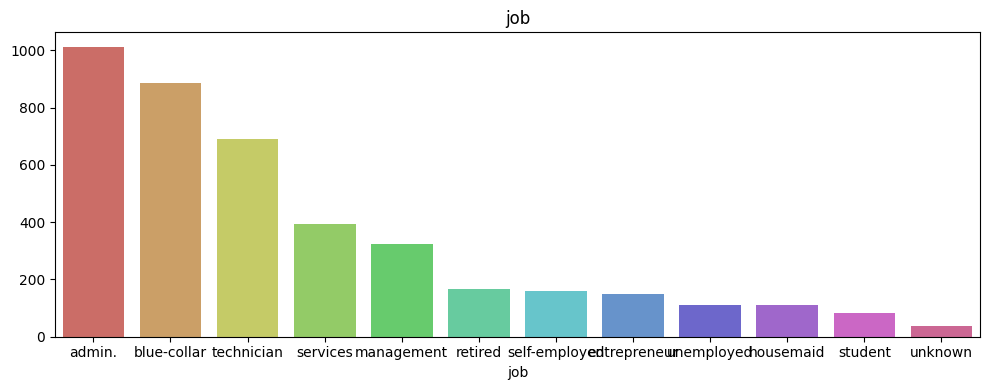

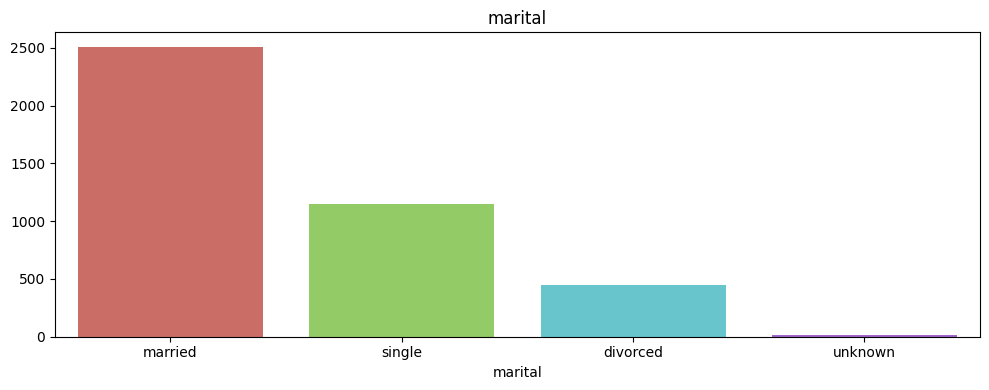

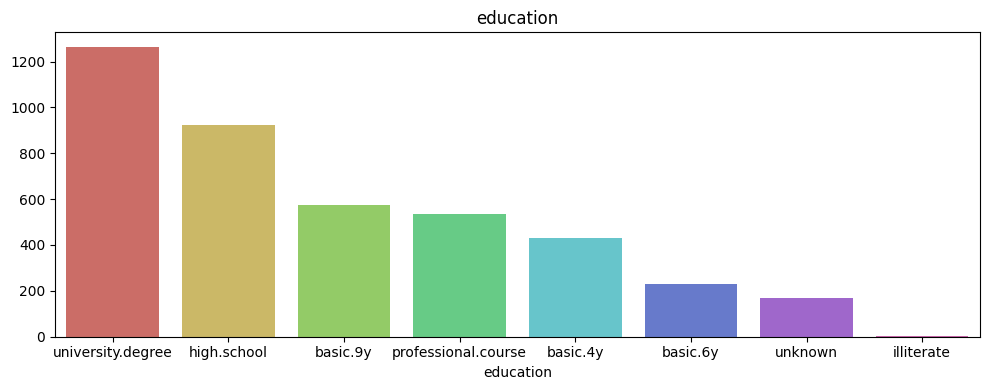

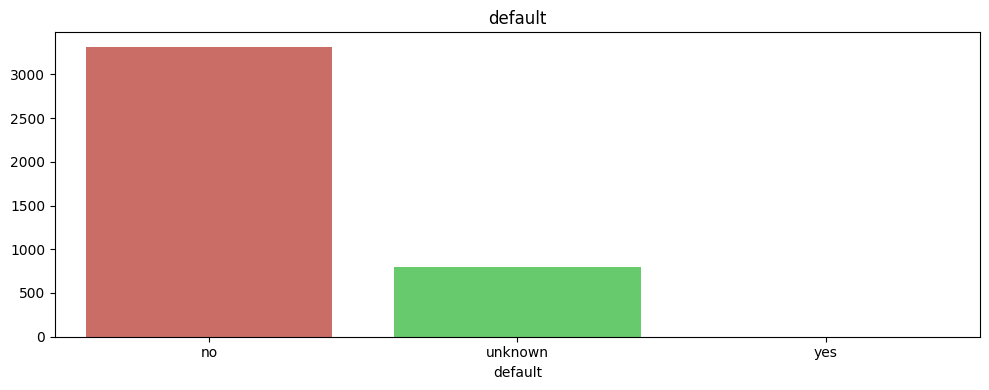

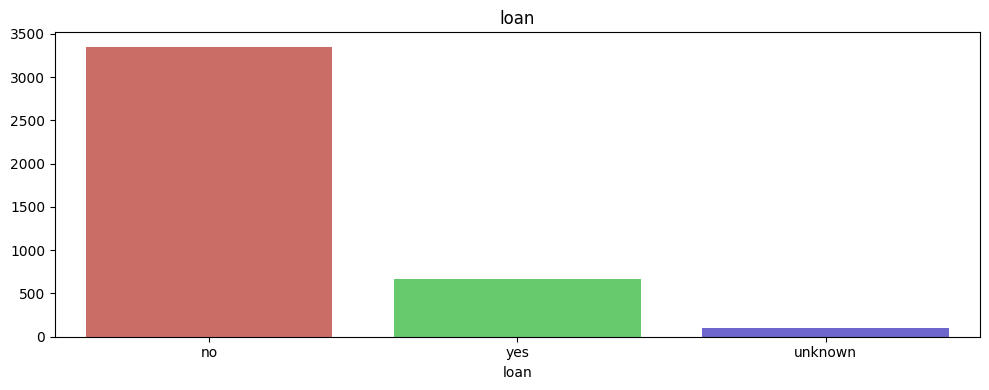

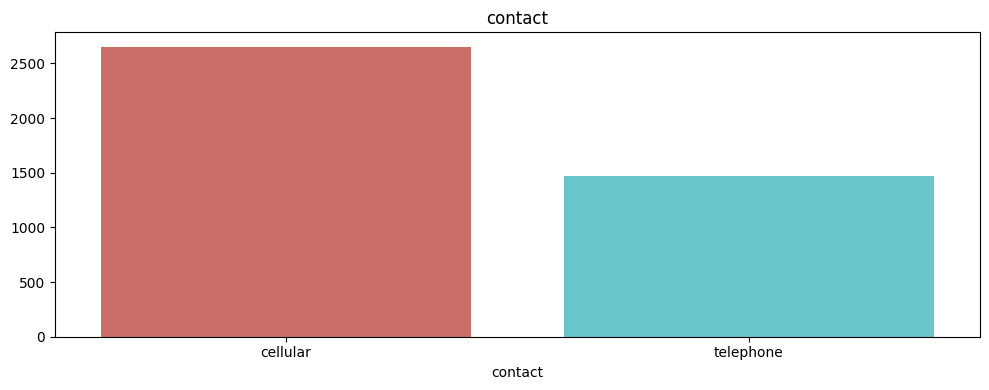

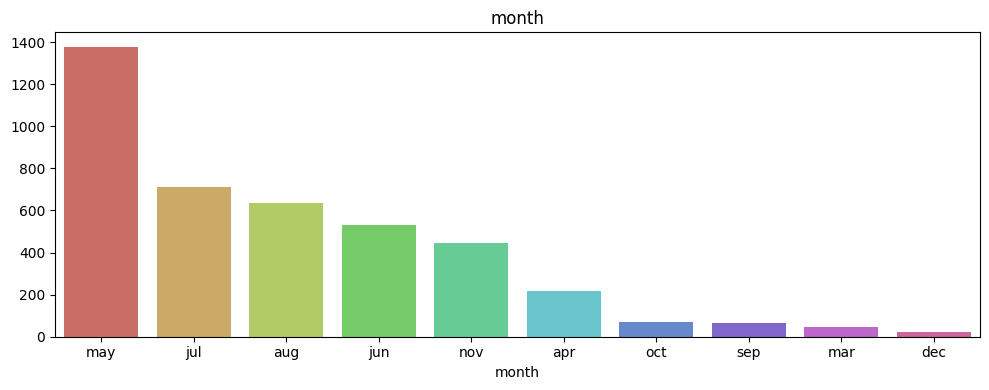

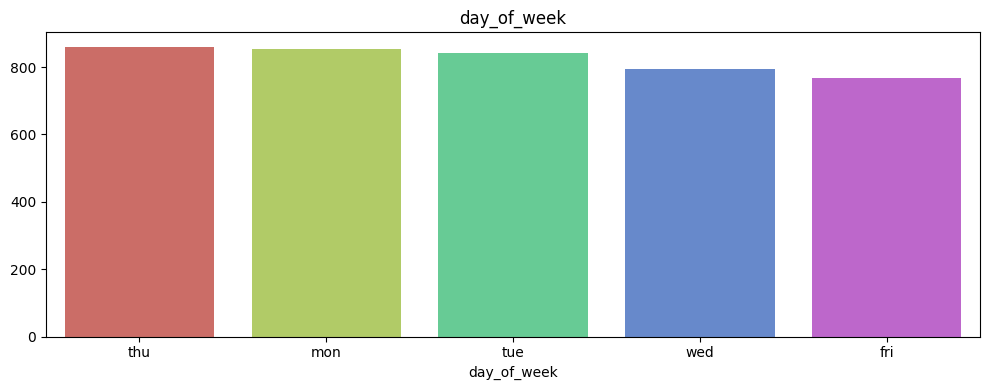

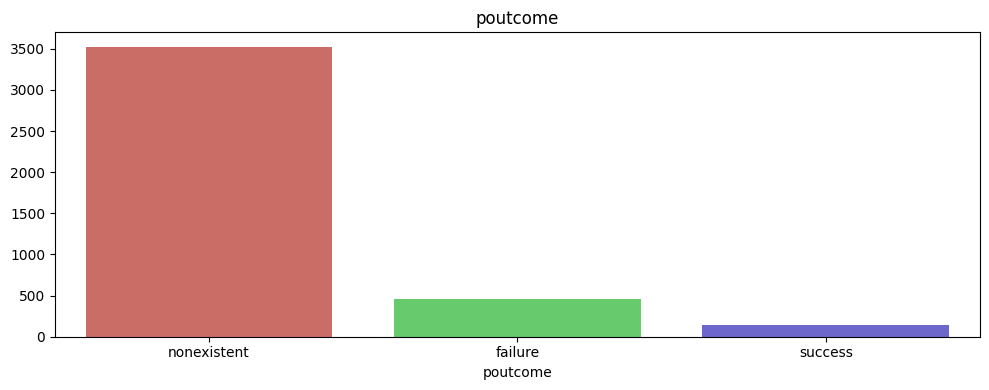

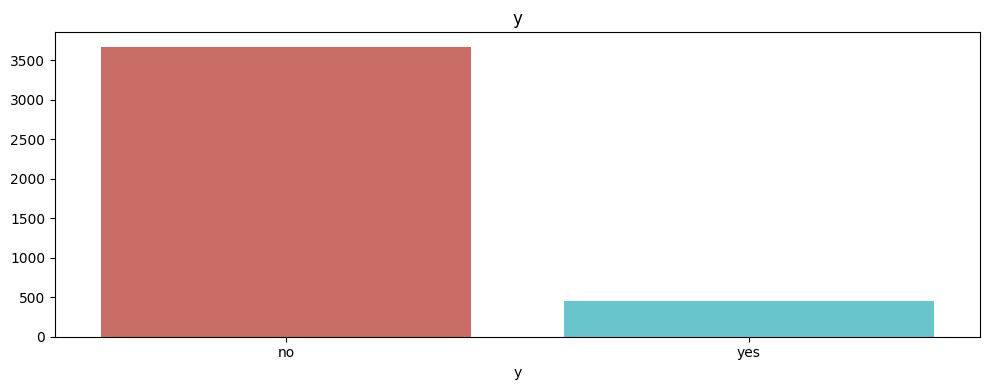

In [6]:
categorical_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorical_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, palette="hls")
    plt.title(col)
    plt.tight_layout()

Membuat barplot untuk masing-masing hasil yang dihasilkan dengan melihat frekuensi relatifnya serta frekuensi relatif yang dinormalkan

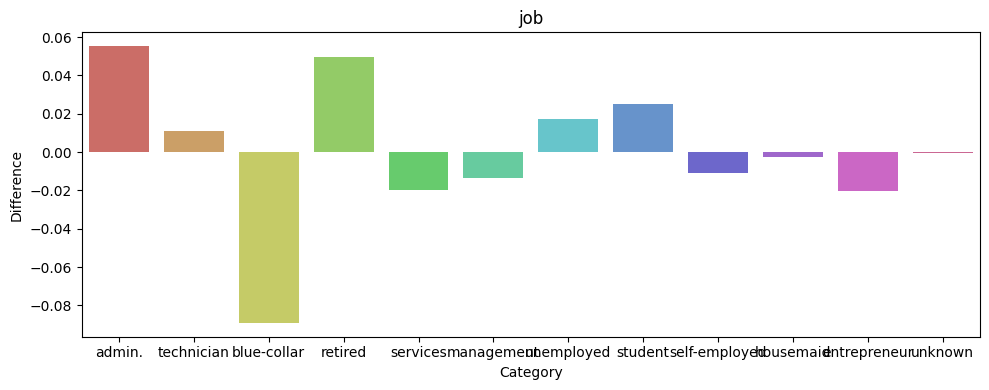

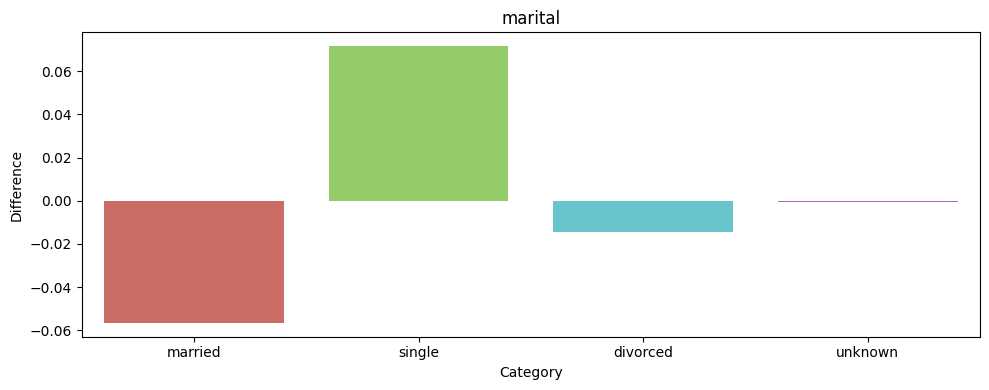

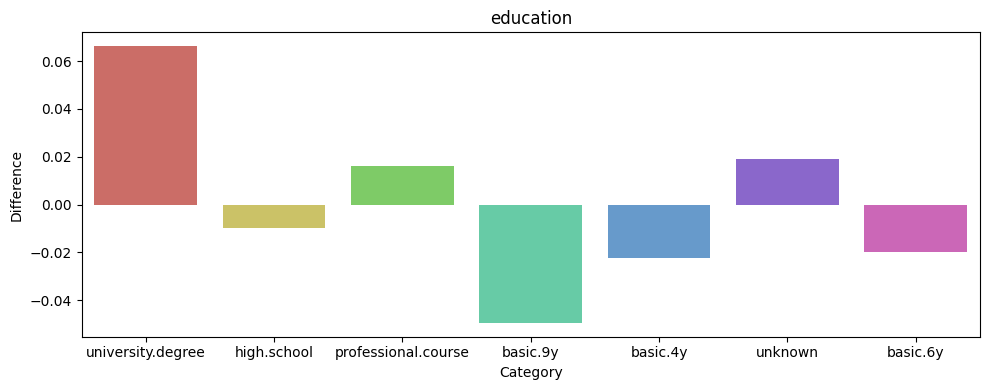

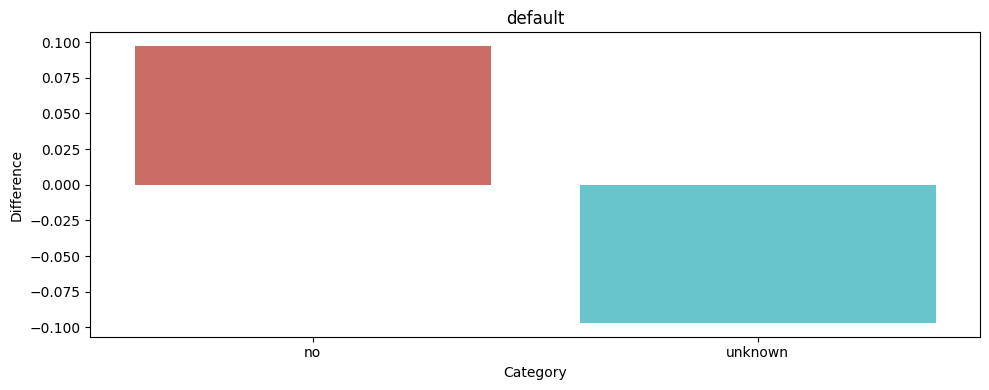

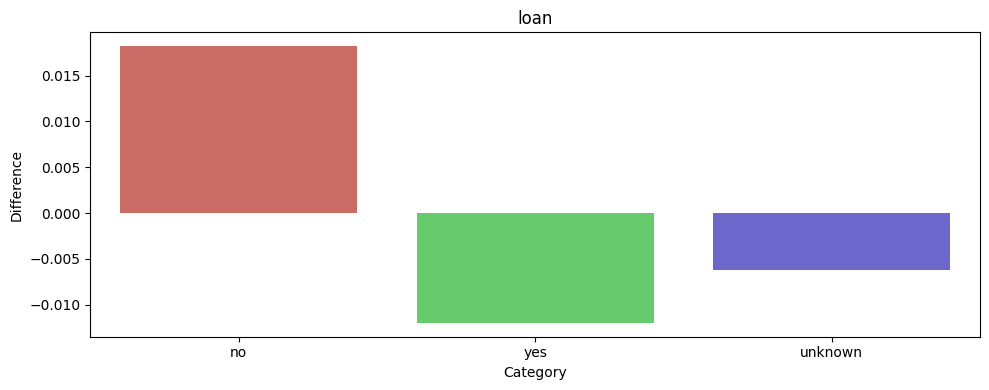

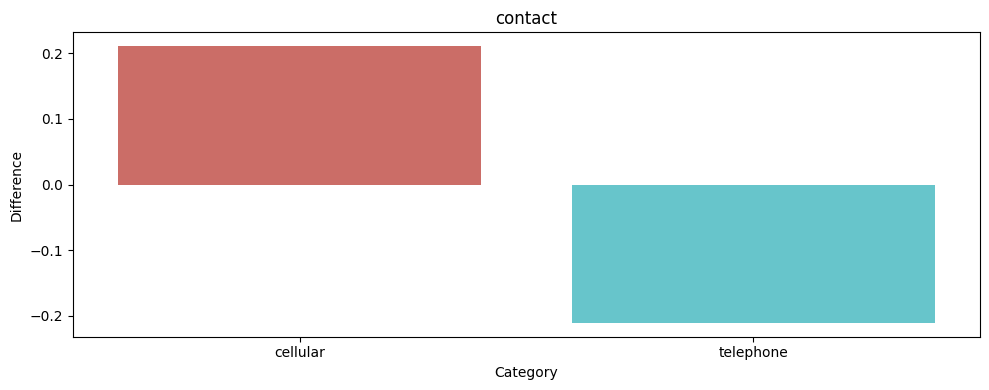

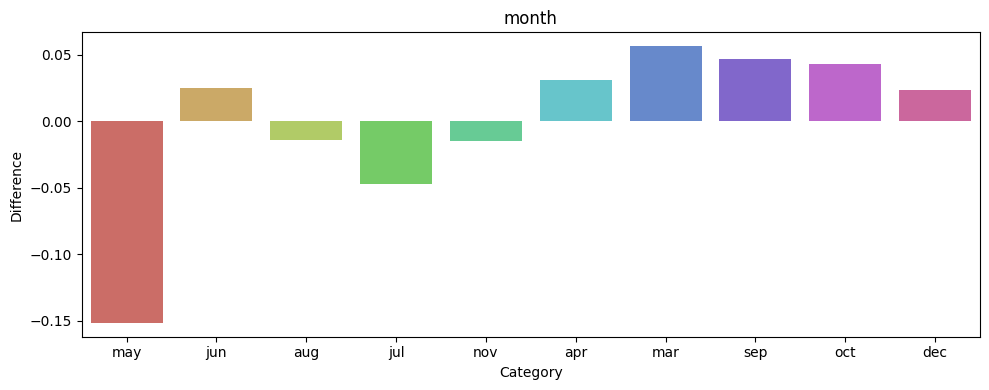

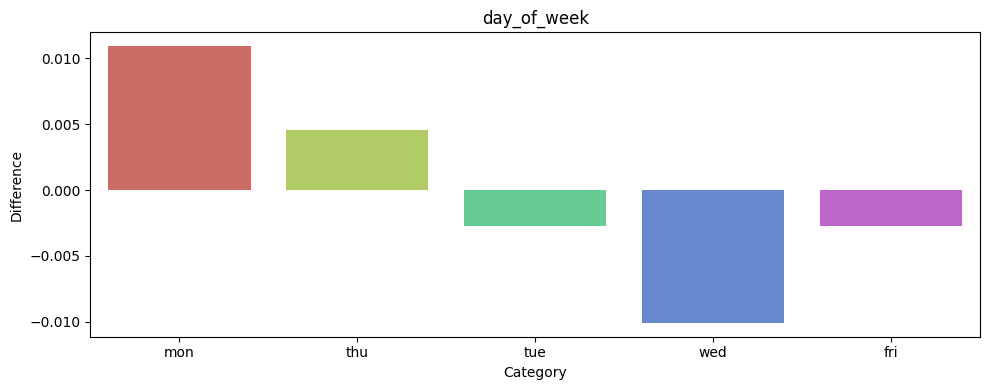

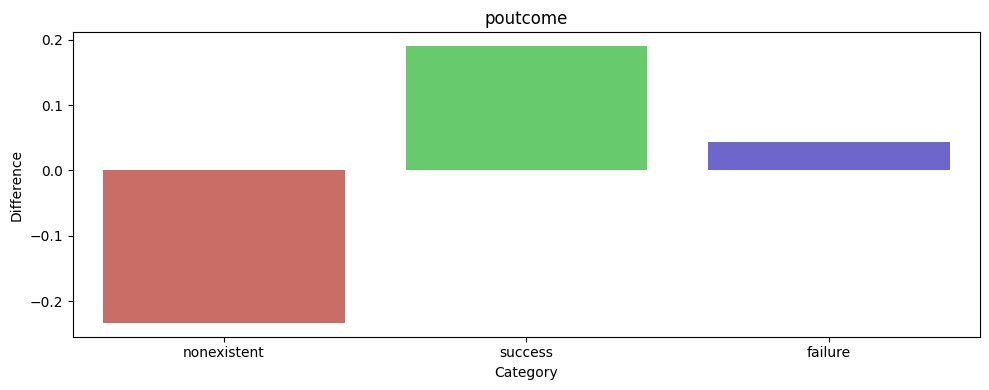

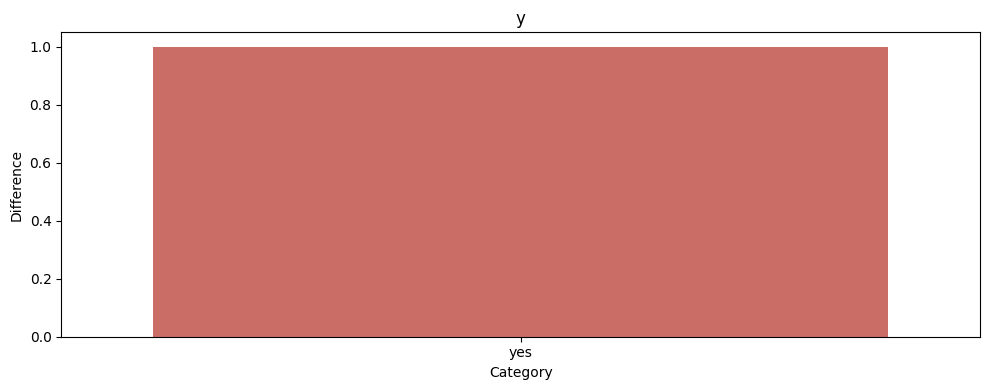

In [7]:
for col in categorical_variables:
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts()
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()

    all_counts = [pos_counts.get(k, 0) / df[df.y.values == 'yes'].shape[0] - neg_counts.get(k, 0) / df[df.y.values == 'no'].shape[0] for k in pos_counts.index]
    all_index = list(pos_counts.index)

    df_combined = pd.DataFrame({
        "Category": all_index,
        "Difference": all_counts,
    })

    plt.figure(figsize=(10, 4))
    sns.barplot(x="Category", y="Difference", data=df_combined, palette="hls")
    plt.title(col)
    plt.tight_layout()

Membuat pie chart

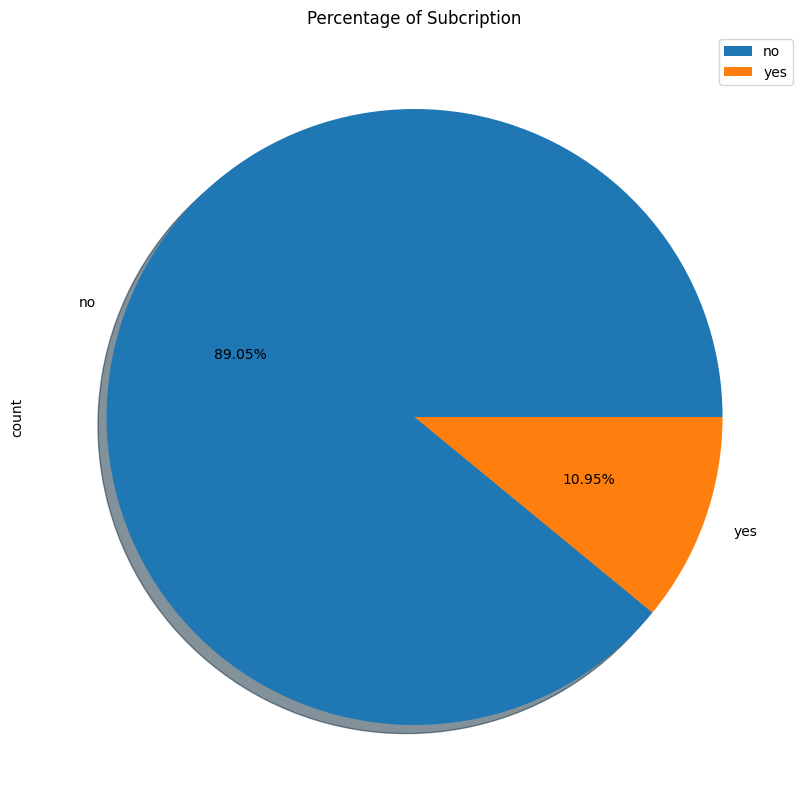

In [8]:
plt.figure(figsize=(10,10))
df['y'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%')
plt.title("Percentage of Subcription")
plt.legend()
plt.show()

Buat cross def tab untuk EDA

In [9]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

Membuat cross tab untuk variable job and education 

In [10]:
cross_tab(df,'job','education')

,basic.9y,high.school,university.degree,professional.course,basic.6y,basic.4y,unknown,illiterate
job,,,,,,,,
admin.,44,311,567,38,20.0,8,24,0.0
blue-collar,324,89,6,49,152.0,222,42,0.0
entrepreneur,23,17,64,14,5.0,18,7,0.0
housemaid,5,11,22,8,9.0,52,3,0.0
management,20,41,220,7,8.0,13,15,0.0
retired,11,24,32,28,6.0,59,5,1.0
self-employed,28,15,87,12,2.0,11,4,0.0
services,56,254,18,25,12.0,16,12,0.0
student,5,35,12,8,0.0,2,20,0.0


Mengisi 'unknown' data dengan relevan data

In [11]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

Cek data apakah sudah terisi dengan cross tab

In [12]:
cross_tab(df,'job','education')

,basic.9y,high.school,university.degree,professional.course,basic.6y,basic.4y,unknown,illiterate
job,,,,,,,,
admin.,44.0,311,567,38.0,20.0,8.0,24.0,0.0
blue-collar,330.0,89,6,49.0,153.0,228.0,42.0,0.0
entrepreneur,23.0,17,64,14.0,5.0,18.0,7.0,0.0
housemaid,5.0,11,22,8.0,9.0,55.0,0.0,0.0
management,20.0,41,235,7.0,8.0,13.0,0.0,0.0
retired,11.0,24,32,28.0,6.0,61.0,7.0,1.0
self-employed,28.0,15,87,12.0,2.0,11.0,4.0,0.0
services,56.0,266,18,25.0,12.0,16.0,0.0,0.0
student,5.0,35,12,8.0,0.0,2.0,20.0,0.0


Membu atcross tab untuk variabel job dan housing 

In [13]:
cross_tab(df,'job','housing')

,yes,no,unknown
job,,,
admin.,556,441,15.0
blue-collar,444,425,28.0
entrepreneur,89,57,2.0
housemaid,60,47,3.0
management,176,145,3.0
retired,91,75,4.0
self-employed,79,73,7.0
services,185,189,19.0
student,38,44,0.0


Dikarenakan data 'unknown' terlalu banyak, jadi dihapus

In [14]:
df = df[df.housing != 'unknown']
df = df[df.loan != 'unknown']
df = df[df.default != 'unknown']
df = df[df.job != 'unknown']
df = df[df.marital != 'unknown']
df = df[df.education != 'unknown']

Melihat shape dari dataset setelah preprocessing

In [15]:
df.shape

(3129, 21)

Cek missing value

In [16]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Cek duplicates value

In [17]:
df.duplicated().sum()

0

Drop duplicates value

In [18]:
df.drop_duplicates(inplace=True)

Melihat statistik deskriptif variabel numerik

In [19]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
df[numerical_variables].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000
mean,39.281560,2.504634,952.966123,0.209652,-0.053755,93.531387,-40.610706,3.475224,5160.828220
std,10.228948,2.587484,208.864892,0.567803,1.599382,0.586021,4.743031,1.772122,76.583383
min,20.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,46.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Membuat histogram plot untuk pdays dengan dan tidak dengan nilai '999' 

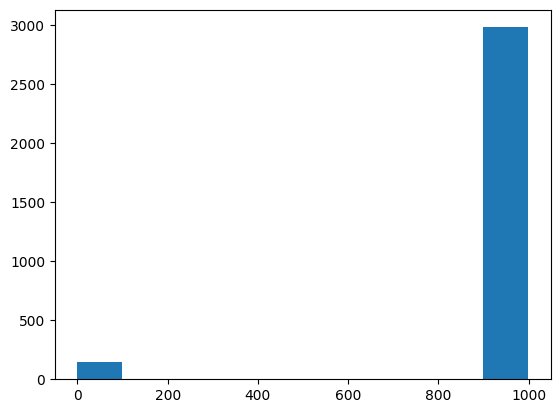

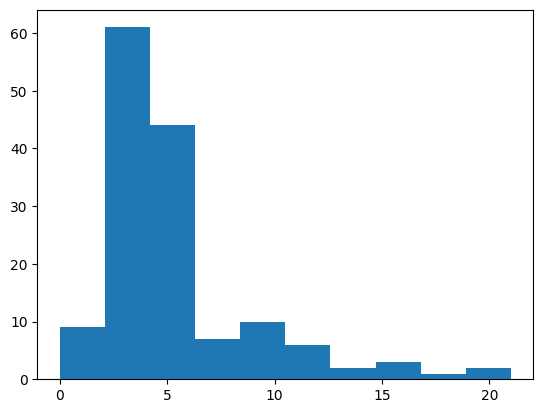

In [20]:
def drawhist(df,feature):
    plt.hist(df[feature])
drawhist(df,'pdays')
plt.show()

plt.hist(df.loc[df.pdays != 999, 'pdays'])
plt.show()

Ditemukan terlalu banyak nilai '999', dianggap sebagai missing value, kemudian diubah menjadi categorical variable

In [21]:
df['pdays_missing'] = 0
df['pdays_less_5'] = 0
df['pdays_greater_15'] = 0
df['pdays_bet_5_15'] = 0
df['pdays_missing'][df['pdays']==999] = 1
df['pdays_less_5'][df['pdays']<5] = 1
df['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
df['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1

Drop durasi dan kolom pdays 

In [22]:
col = ['duration', 'pdays']
df.drop(col, axis=1,inplace=True)

Melihat tabel 5 teratas pada dataset

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,-1.8,92.893,-46.2,1.313,5099.1,no,1,0,0,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,1.1,93.994,-36.4,4.855,5191.0,no,1,0,0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.4,94.465,-41.8,4.962,5228.1,no,1,0,0,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,-0.1,93.200,-42.0,4.191,5195.8,no,1,0,0,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,-1.1,94.199,-37.5,0.884,4963.6,no,1,0,0,0


Encode variabel kategori dengan encoder label

In [24]:
object_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,30,1,1,2,0,1,0,0,6,0,...,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,0,0
1,39,7,2,3,0,0,0,1,6,0,...,1.1,93.994,-36.4,4.855,5191.0,0,1,0,0,0
2,25,7,1,3,0,1,0,1,4,4,...,1.4,94.465,-41.8,4.962,5228.1,0,1,0,0,0
4,47,0,1,6,0,1,0,0,7,1,...,-0.1,93.200,-42.0,4.191,5195.8,0,1,0,0,0
5,32,7,2,6,0,0,0,0,9,2,...,-1.1,94.199,-37.5,0.884,4963.6,0,1,0,0,0


Melihat list header

In [25]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays_missing', 'pdays_less_5',
       'pdays_greater_15', 'pdays_bet_5_15'], dtype=object)

Membuat def code untuk visualisasi

In [26]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')
    
def drawhist(df,feature):
    '''Draws an histogram for a feature in a data frame (df)'''
    plt.hist(df[feature])

def functionreplace(df,fea,val1,val2):
    '''Replaces value (val1) with value (val2) in the data frame (df) for a feature (fea)'''
    df[fea].replace(val1,val2)
    return df

def drawbarplot(df,x,y):
    '''Draws a bar plot for a given feature x and y in a data frame'''
    sns.barplot(x=x, y=y, data=df)
    

Membuat heat map untuk clean data

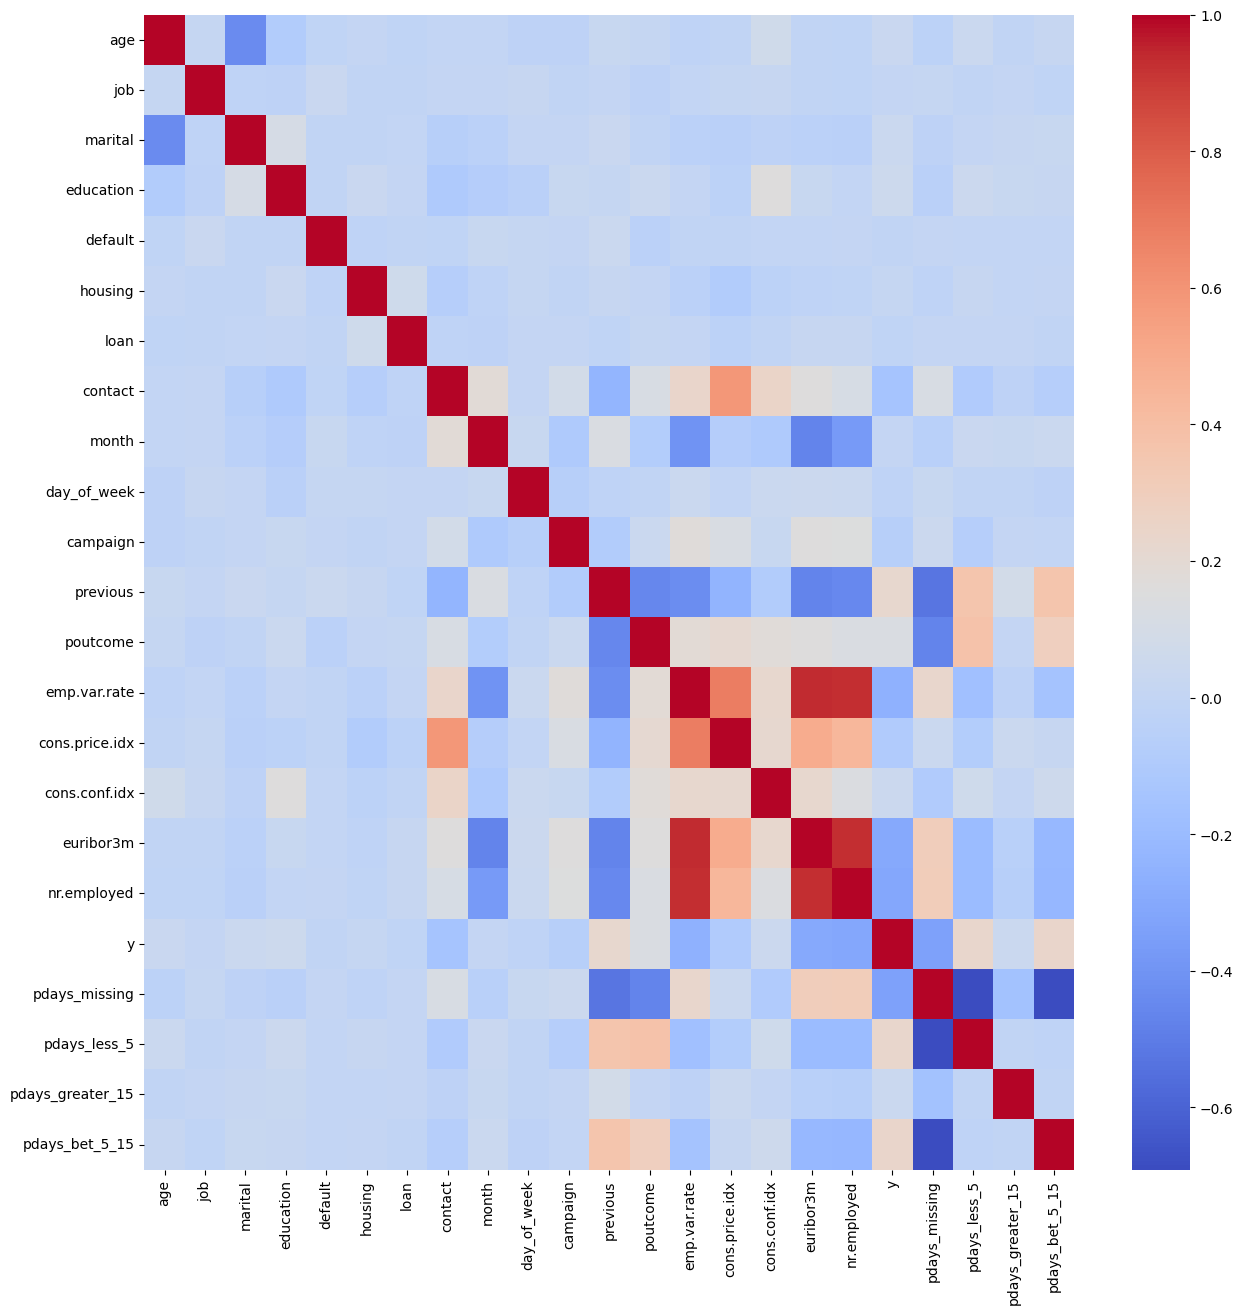

In [27]:
drawheatmap(df)

inisialisasi clean data

In [28]:
df_clean = df

## Data Partition dan SMOTE

Membuat data partisi untuk pemodelan

In [29]:
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
train,test = train_test_split(df_clean,test_size = 0.20 ,random_state = 111)
    
##seperating dependent and independent variables on training and testing data
train_X = train.drop(labels='y',axis=1)
train_Y = train['y']
test_X  = test.drop(labels='y',axis=1)
test_Y  = test['y']

Overcoming data imbalance with SMOTE

In [30]:
from imblearn.over_sampling import SMOTE

os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

## Modelling

Menggunakan 6 algoritma yang berbeda untuk menemukan model evaluasi mana yang terbaik. 
1. Logistic Regression
2. K-Nearest Neightbors
3. Support Vector Machine
4. Decision Tree
5. Random Forest
6. Naive Bayes. 

6 algoritma diatas merupakan algoritma untuk menangani kasus klasifikasi pada machine learning.

In [31]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [32]:
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Inisialisasi paramenter dari LogReg model

In [33]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Mencocokan model dengan train smote data

In [34]:
model.fit(train_smote_X, train_smote_Y)

LogisticRegression(random_state=0, solver='liblinear')

Menampilkan intersep dan koefisien model

In [35]:
print(model.intercept_, model.coef_)

[-0.12765222] [[-0.0112271  -0.03820461 -0.54135545 -0.05919873 -0.2299009  -0.5634078
  -1.64397193 -1.56170818 -0.13486635 -0.15764466 -0.27181892 -1.14598776
  -1.00819816 -0.64748265  0.82346574  0.01073692  0.66007548 -0.01357164
  -4.73854456 -0.47226641 -1.46427417 -1.4410046 ]]


Membuat perdiksi untuk test data

In [36]:
pred1 = model.predict(test_X)

Evaluasi model dengan confusion matrix

In [37]:
confusion_matrix(test_Y, pred1)

array([[477,  75],
       [ 36,  38]])

Evaluasi model dengan accuracy score

In [38]:
from sklearn.metrics import accuracy_score
print("Akurasi untuk Logistic Regression: ",
      accuracy_score(test_Y,pred1))

Akurasi untuk Logistic Regression:  0.8226837060702875


### K-Nearest Neighbors

Import library KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Inisialisasi parameter untuk menyetel pencarian grid hyperparameter CV

In [40]:
grid_param2 = {
    'n_neighbors': [5,15,35], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean','manhattan']
    }

Sesuaikan model dengan penyetelan hyperparameter grid search CV untuk mendapatkan parameter optimal.

In [41]:
gs2 = GridSearchCV(estimator=knn,
                    param_grid=grid_param2,
                    scoring='accuracy',
                    cv=3)
gs2.fit(train_smote_X,train_smote_Y)
best_parameters2 = gs2.best_params_
print(best_parameters2)

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


Menemukan parameter terbaik adalah metric='manhattan',n_neighbors=5, weights='distance. Untuk mempersingkat waktu, melakukan pemodelan dengan parameter optimal yang diperoleh tadi.

In [42]:
model2 = KNeighborsClassifier(metric='manhattan',n_neighbors=5, weights='distance')

Menyesuaikan model dengan train smote data

In [43]:
model2.fit(train_smote_X, train_smote_Y)

KNeighborsClassifier(metric='manhattan', weights='distance')

Membuat prediksi untuk test data

In [44]:
pred2=model2.predict(test_X)

Evaluasi model dengan accuracy score

In [45]:
from sklearn.metrics import accuracy_score
print("Accuracy for KNN: ",
      accuracy_score(test_Y,pred2))

Accuracy for KNN:  0.7731629392971247


Evaluasi model dengan confusion matrix

In [46]:
CF2=confusion_matrix(test_Y, pred2)
CF2

array([[442, 110],
       [ 32,  42]])

### Support Vector Machine

Import library untuk SVM

In [47]:
from sklearn.svm import SVC
from sklearn import svm 
esviem = SVC()

Inisialisasi model

In [48]:
clf = svm.SVC(kernel='linear')

Menyesuaikan model dengan train smote data

In [49]:
clf.fit(train_smote_X,train_smote_Y)

SVC(kernel='linear')

Membuat pediksi untuk test data

In [50]:
pred3=clf.predict(test_X)

Evaluasi model dengan confusion matrix

In [51]:
CF3=confusion_matrix(test_Y, pred3)
CF3

array([[515,  37],
       [ 46,  28]])

Evaluasi model dengan accuracy score

In [52]:
print("Accuracy for SVM: ",
      accuracy_score(test_Y,pred3))

Accuracy for SVM:  0.8674121405750799


### Decision Tree

Import library yang digunakan untuk Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

Inisialisasi parameters untuk hyperparameter grid search CV

In [54]:
grid_param4 = {
   'max_depth': [10,20,100],  
   'criterion': ['gini','entropy']
   }

Menyesualikan model dengan tuning hyperparameter grid search CV untuk memperoleh parameter yang optimal

In [55]:
gs4 = GridSearchCV(estimator=dec_tree,
                     param_grid=grid_param4,
                     scoring='accuracy',
                     cv=3)
gs4.fit(train_smote_X,train_smote_Y)
best_parameters4 = gs4.best_params_
print(best_parameters4)

{'criterion': 'gini', 'max_depth': 100}


Ditemukan parameter terbaik adalah criteria='entropy',max_depth=100. 

In [56]:
model4 = DecisionTreeClassifier(criterion='entropy',max_depth=100)
model4.fit(train_smote_X,train_smote_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

Membuat prediksi untuk test data

In [57]:
pred4=model4.predict(test_X)

Evaluasi model dengan accuracy score

In [58]:
print("Accuracy for Decision Tree: ",
      accuracy_score(test_Y,pred4))

Accuracy for Decision Tree:  0.7955271565495208


Evaluasi model dengan confusion matrix

In [59]:
CF4=confusion_matrix(test_Y, pred4)
CF4

array([[476,  76],
       [ 52,  22]])

### Random Forest

Import library yang digunakan untuk Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=123)

Inisialisasi parameter untuk hyperparameter grid search CV

In [61]:
param_grid = { 
    'n_estimators': [200, 1000],
    'max_features': ['auto','log2'],
    'criterion' :['entropy','gini']
}

Menyesuaikan model untuk  hyperparameter grid search CV untuk mendapatkan optimal paramenter.

In [62]:
CV_rfc = GridSearchCV(estimator=rfc, 
                      param_grid=param_grid, 
                      cv= 3)
CV_rfc.fit(train_smote_X, train_smote_Y)
best_parameters5 = CV_rfc.best_params_
print(best_parameters5)

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 1000}


Ditemukan parameter terbaik adalah criteria='entropy',max_features='auto',n_estimators=1000. 

In [64]:
model5 = RandomForestClassifier(criterion='entropy', max_features=None, n_estimators=1000)
model5.fit(train_smote_X, train_smote_Y)

RandomForestClassifier(criterion='entropy', max_features=None,
                       n_estimators=1000)

Buat prediksi untuk test data

In [65]:
pred5=model5.predict(test_X)

Evaluasi model dengan accuracy score

In [66]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest: ",accuracy_score(test_Y,pred5))

Accuracy for Random Forest:  0.8610223642172524


Evaluasi model dengan confusion matrix

In [67]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(test_Y, pred5)
CF

array([[515,  37],
       [ 50,  24]])

### Naive Bayes

Import library untuk Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

Meneysuaikan model dengan train smote data

In [69]:
gnb.fit(train_smote_X, train_smote_Y)

GaussianNB()

Membuat prediksi untuk test data

In [70]:
pred6 = gnb.predict(test_X)

Evaluasi model dengan accuracy score

In [71]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy for Naive Bayes:",metrics.accuracy_score(test_Y, pred6))

Accuracy for Naive Bayes: 0.744408945686901


Evaluasi model dengan confusion matrix

In [72]:
from sklearn.metrics import confusion_matrix
CF6=confusion_matrix(test_Y, pred6)
CF6

array([[425, 127],
       [ 33,  41]])

## Load Model

In [73]:
print("Accuracy for Logistic Regression: ",
      accuracy_score(test_Y,pred1))
print("Accuracy for KNN: ",
      accuracy_score(test_Y,pred2))
print("Accuracy for SVM: ",
       accuracy_score(test_Y,pred3))
print("Accuracy for Decision Tree: ",
      accuracy_score(test_Y,pred4))
print("Accuracy for Random Forest: ",
      accuracy_score(test_Y,pred5))
print("Accuracy for Naive Bayes:",
      metrics.accuracy_score(test_Y, pred6))

Accuracy for Logistic Regression:  0.8226837060702875
Accuracy for KNN:  0.7731629392971247
Accuracy for SVM:  0.8674121405750799
Accuracy for Decision Tree:  0.7955271565495208
Accuracy for Random Forest:  0.8610223642172524
Accuracy for Naive Bayes: 0.744408945686901


## Analisis Algoritma


1. Dari segi **akurasi** SVM tampil menjadi model terbaik dengan nilai 0.867
2. Naive Bayes memberikan performa akurasi paling rendah